# Figure 1

In [ ]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Classes.bar import Bar
from Config.config import PATHS

In [ ]:
def plot_stability(list_of_alternations, list_of_titles, num_rounds):
	fig, axes = plt.subplots(len(list_of_alternations))
	for i, alternations in enumerate(list_of_alternations):
		# Detect number of agents
		num_agents = len(alternations[0])
		# Create bar object
		bar = Bar(
			num_agents=num_agents,
			threshold=0.5
		)
		bar.history = alternations * (num_rounds // len(alternations)) + alternations[:num_rounds % len(alternations)]
		attendance_file_name = None #'alternations.png'
		bar.render(
			ax=axes[i],
			file=attendance_file_name,
			num_rounds=len(bar.history)
		)
#		axes[i].imshow(plt.imread(attendance_file_name))
		if list_of_titles is not None:
			axes[i].set_title(list_of_titles[i])
		axes[i].axis('off')
	fig.tight_layout()
	fig.savefig(PATHS['figures_for_paper'] / 'Figure1.png', dpi=300)
	fig.show()

/var/folders/pc/08jfyvdx7_1b_0dnj5kpf4qw0000gn/T/ipykernel_92947/1719011873.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


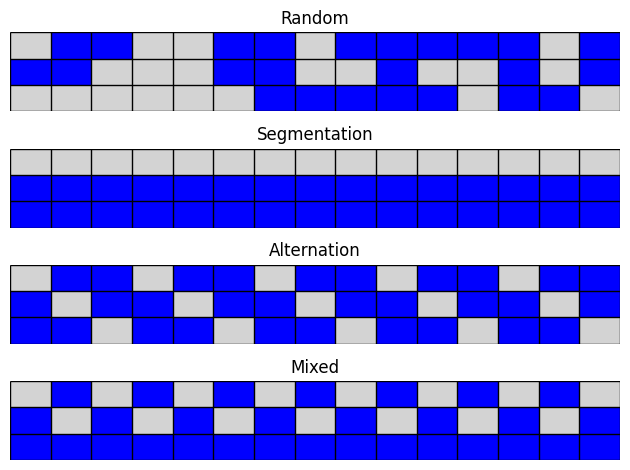

In [11]:
num_rounds = 15
list_of_alternations = [
	[np.random.randint(0, 2, 3).tolist() for _ in range(num_rounds)],
	[[1, 1, 0]],
	[[1, 1, 0], [1, 0, 1], [0, 1, 1]],
	[[1, 1, 0], [1, 0, 1]],
]
plot_stability(
    list_of_alternations=list_of_alternations, 
    list_of_titles = ['Random', 'Segmentation', 'Alternation', 'Mixed'],
    num_rounds=num_rounds
)